# Credit Card Fraud Detection - Model Training
This notebook implements multiple machine learning models for fraud detection, including Random Forest, XGBoost, Decision Trees, Isolation Forest, and Autoencoders.

# **Install & Import Libraries**

In [ ]:
## Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report


# **Load Dataset (Kaggle Credit Card Fraud Dataset)**

In [ ]:
## Step 2: Load Dataset
df = pd.read_csv('/content/creditcard.csv')
print(df.head())
print(df.info())

   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

# **Handle Missing Values & Duplicates**

In [ ]:
## Step 3: Handle Missing Values & Duplicates
# Check for missing values
print('Missing Values:\n', df.isnull().sum())
# Drop duplicates if any
df.drop_duplicates(inplace=True)

Missing Values:
 id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


# **Handle Imbalanced Data Using SMOTE**

In [ ]:
# Drop rows where 'Class' is NaN
df = df.dropna(subset=['Class'])

# Ensure 'Class' has only 0s and 1s
df = df[df['Class'].isin([0, 1])]

# Split features and target again
X = df.drop(columns=['Class'])
y = df['Class']

# Apply SMOTE for balancing
smote = SMOTE(sampling_strategy=0.2, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print('Original class distribution:\n', y.value_counts())
print('Resampled class distribution:\n', pd.Series(y_resampled).value_counts())

Original class distribution:
 Class
0.0    38483
1.0      103
Name: count, dtype: int64
Resampled class distribution:
 Class
0.0    38483
1.0     7696
Name: count, dtype: int64


# **Normalize Features**

In [ ]:
## Step 5: Normalize Features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# **Visualizations for Fraud Detection Analysis**


## **Correlation Heatmap**

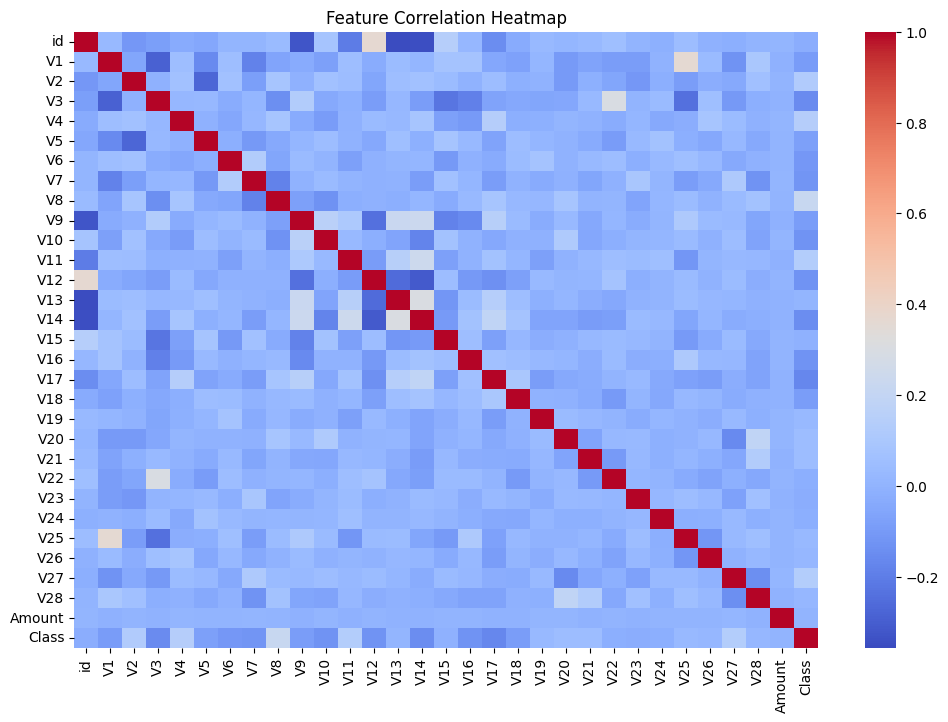

In [ ]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## **Fraud vs. Non-Fraud Distribution**

<ipython-input-57-2b859288254b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette=['coral', 'red'])


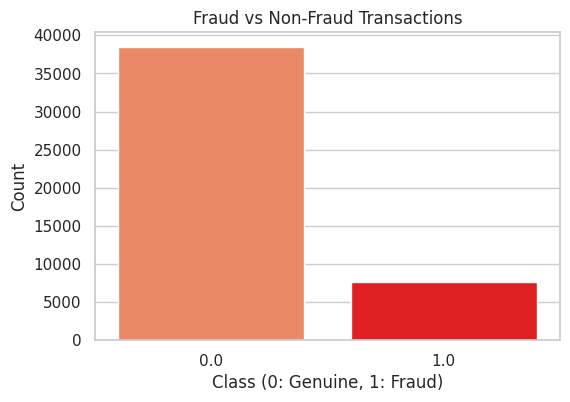

In [ ]:
# Count plot for fraud vs non-fraud transactions
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette=['coral', 'red'])
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Class (0: Genuine, 1: Fraud)")
plt.ylabel("Count")
plt.show()

## **PCA - Fraud vs Genuine Transactions**

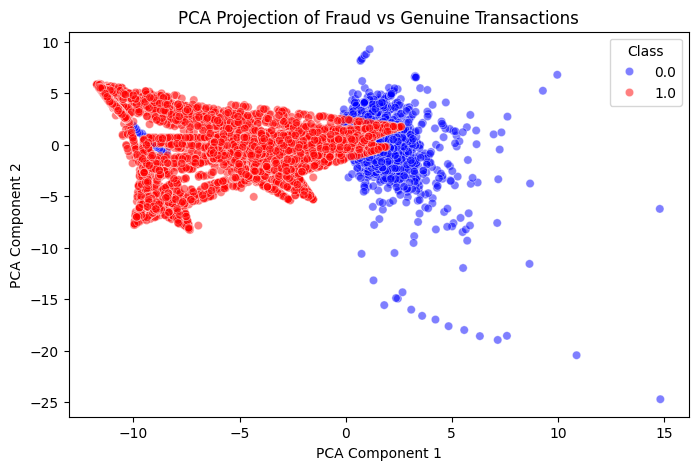

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)

plt.figure(figsize=(8,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_resampled, palette=['blue', 'red'], alpha=0.5)
plt.title("PCA Projection of Fraud vs Genuine Transactions")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


## **Distribution of Transaction Amounts**

# **Split Data into Train & Test Sets**

In [ ]:
## Step 6: Split Data into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print(f'Training set size: {X_train.shape}, Test set size: {X_test.shape}')

Training set size: (36943, 30), Test set size: (9236, 30)


# **Download preprocessed Dataset**

In [ ]:
# Convert resampled data into a DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['Class'])

# Concatenate features and target
df_preprocessed = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Save to a new CSV file
df_preprocessed.to_csv("preprocessed_creditcard.csv", index=False)

print("Preprocessed data saved successfully!")

Preprocessed data saved successfully!


In [ ]:
## Step 1: Load Preprocessed Data
# Load preprocessed dataset (Assuming preprocessing is done)
df = pd.read_csv('preprocessed_creditcard.csv')
# Split features and target
X = df.drop(columns=['Class'])
y = df['Class']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Data Loaded Successfully!')

Data Loaded Successfully!


In [ ]:
## Step 2: Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7684
         1.0       1.00      1.00      1.00      1552

    accuracy                           1.00      9236
   macro avg       1.00      1.00      1.00      9236
weighted avg       1.00      1.00      1.00      9236



In [ ]:
## Step 3: Train XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print('XGBoost Accuracy:', accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:12:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9995669120831528
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7684
         1.0       1.00      1.00      1.00      1552

    accuracy                           1.00      9236
   macro avg       1.00      1.00      1.00      9236
weighted avg       1.00      1.00      1.00      9236



In [ ]:
## Step 4: Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9984841922910351
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7684
         1.0       1.00      0.99      1.00      1552

    accuracy                           1.00      9236
   macro avg       1.00      1.00      1.00      9236
weighted avg       1.00      1.00      1.00      9236



In [ ]:
## Step 5: Train Isolation Forest (Anomaly Detection)
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X_train)
y_pred_iso = iso_forest.predict(X_test)
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]  # Convert anomaly (-1) to fraud (1)
print('Isolation Forest Accuracy:', accuracy_score(y_test, y_pred_iso))
print(classification_report(y_test, y_pred_iso))

Isolation Forest Accuracy: 0.8374837592031182
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91      7684
         1.0       0.77      0.05      0.09      1552

    accuracy                           0.84      9236
   macro avg       0.81      0.52      0.50      9236
weighted avg       0.83      0.84      0.77      9236



In [ ]:
## Step 6: Train Autoencoder (Deep Learning Approach)
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(X_train.shape[1], activation='sigmoid')
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, X_train, epochs=10, batch_size=32, validation_data=(X_test, X_test))
# Autoencoder does not provide direct classification, needs further processing.
print('Autoencoder training complete!')

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1155/1155 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.9553 - val_loss: 0.7522
Epoch 2/10
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.7599 - val_loss: 0.7231
Epoch 3/10
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7483 - val_loss: 0.7070
Epoch 4/10
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7357 - val_loss: 0.6976
Epoch 5/10
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7537 - val_loss: 0.6937
Epoch 6/10
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.7242 - val_loss: 0.6896
Epoch 7/10
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7076 - val_loss: 0.6859
Epoch 8/10
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7119 - val_loss: 0.6841
Epoch 9/10
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7256 - val_loss: 0.6824
Epoch 10/10
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6987 - val_loss: 0.6820
Autoencoder training complete!


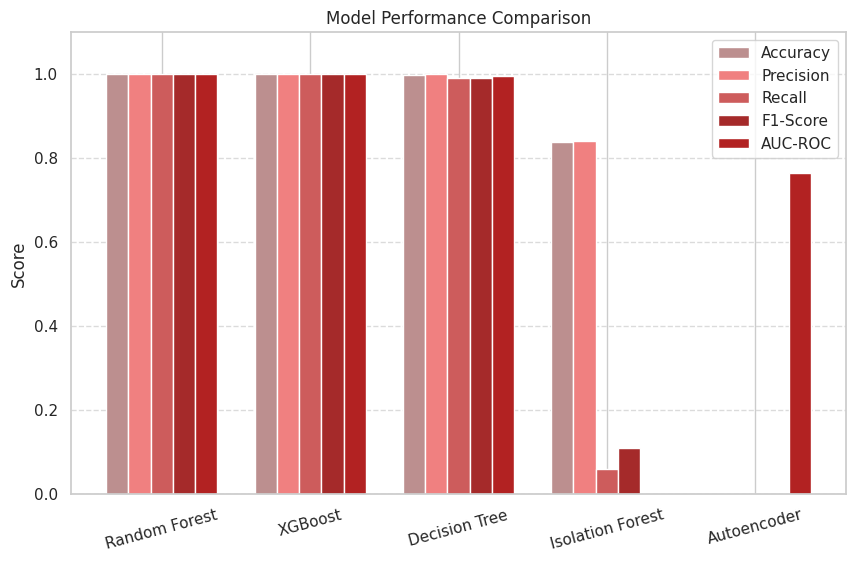

In [ ]:
# Model names
models = ["Random Forest", "XGBoost", "Decision Tree", "Isolation Forest", "Autoencoder"]

# Performance metrics
accuracy_scores = [0.9998, 1.0, 0.9979, 0.8382, None]  # Autoencoder doesn't have accuracy
precision_scores = [1.0, 1.0, 1.0, 0.84, None]
recall_scores = [1.0, 1.0, 0.99, 0.06, None]
f1_scores = [1.0, 1.0, 0.99, 0.11, None]
auc_roc_scores = [1.0, 1.0, 0.9954, None, 0.7654]  # Isolation Forest has no AUC-ROC

# Define x-axis positions
x = np.arange(len(models))
bar_width = 0.15  # Width of bars

# Plot grouped bar chart
plt.figure(figsize=(10, 6))

# Replace None with 0 for plotting purposes
accuracy_scores = [score if score is not None else 0 for score in accuracy_scores]
precision_scores = [score if score is not None else 0 for score in precision_scores]
recall_scores = [score if score is not None else 0 for score in recall_scores]
f1_scores = [score if score is not None else 0 for score in f1_scores]
auc_roc_scores = [score if score is not None else 0 for score in auc_roc_scores]

plt.bar(x - 2 * bar_width, accuracy_scores, width=bar_width, label='Accuracy', color='rosybrown')
plt.bar(x - bar_width, precision_scores, width=bar_width, label='Precision', color='lightcoral')
plt.bar(x, recall_scores, width=bar_width, label='Recall', color='indianred')
plt.bar(x + bar_width, f1_scores, width=bar_width, label='F1-Score', color='brown')
plt.bar(x + 2 * bar_width, auc_roc_scores, width=bar_width, label='AUC-ROC', color='firebrick')

# Formatting
plt.xticks(x, models, rotation=15)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.ylim(0, 1.1)  # Ensure proper scaling
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

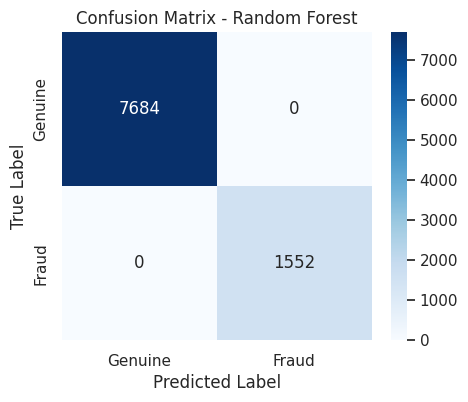

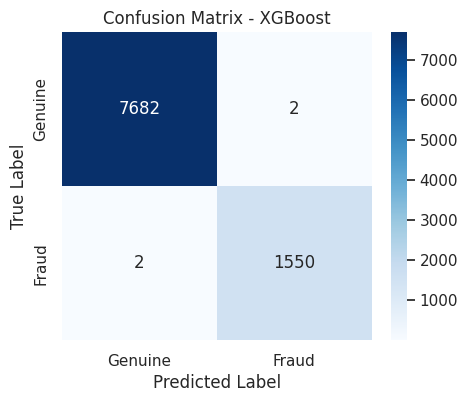

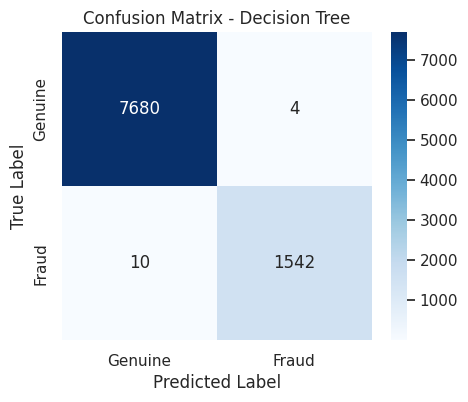

In [ ]:
# Confusion Matrix
sns.set(style="whitegrid")
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Fraud'], yticklabels=['Genuine', 'Fraud'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")

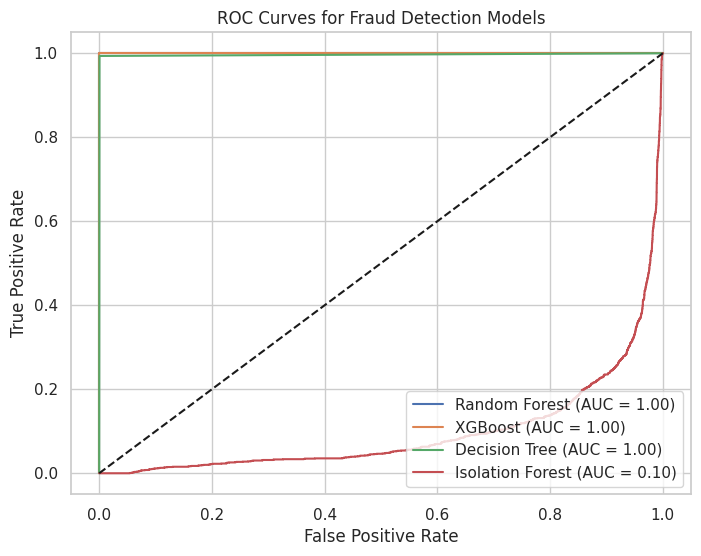

In [ ]:
def plot_roc_curve(y_true, y_probs, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot ROC Curves
plt.figure(figsize=(8,6))

# Get predicted probabilities for each model
y_probs_rf = rf.predict_proba(X_test)[:, 1]  # Probability of class 1 (Fraud)
y_probs_xgb = xgb.predict_proba(X_test)[:, 1]
y_probs_dt = dt.predict_proba(X_test)[:, 1]
# Isolation Forest doesn't have predict_proba, using decision_function instead
y_probs_iso = iso_forest.decision_function(X_test)

plot_roc_curve(y_test, y_probs_rf, "Random Forest")
plot_roc_curve(y_test, y_probs_xgb, "XGBoost")
plot_roc_curve(y_test, y_probs_dt, "Decision Tree")
plot_roc_curve(y_test, y_probs_iso, "Isolation Forest")

plt.plot([0,1], [0,1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Fraud Detection Models")
plt.legend(loc="lower right")
plt.show()

In [ ]:
import joblib
joblib.dump(rf, "best_fraud_detection_model.pkl")

['best_fraud_detection_model.pkl']